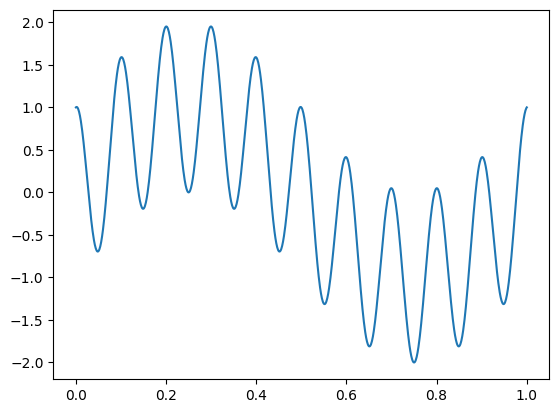

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 1000)
f = np.sin(2*np.pi*x) + np.cos(2*np.pi*10*x)
plt.plot(x, f)

Task 1

Check the documentation of the numpy.fft module to understand what the FFT computes. Compute the transform of the above function. Note that the Fourier transform yields a complex number that has real and imaginary parts, or equivalently, an amplitude and a phase. Plot only the amplitude or the square of the amplitude of the above function as a function of wavevector. (What is a wavevector? You get hints at this by reading the documentation. Also look at the documentation of the helper function numpy.fft.fftfreq.) The square of the amplitude is also called the power spectrum of that function. What do you see?

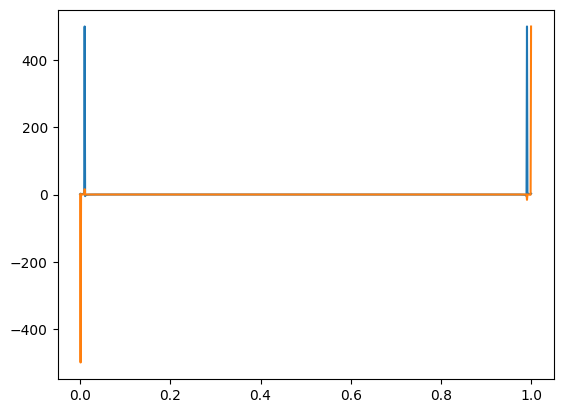

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 1000)
f = np.sin(2*np.pi*x) + np.cos(2*np.pi*10*x)
fft = np.fft.fft(f)
# fft = np.abs(fft)
plt.plot(x, fft.real)
plt.plot(x, fft.imag)

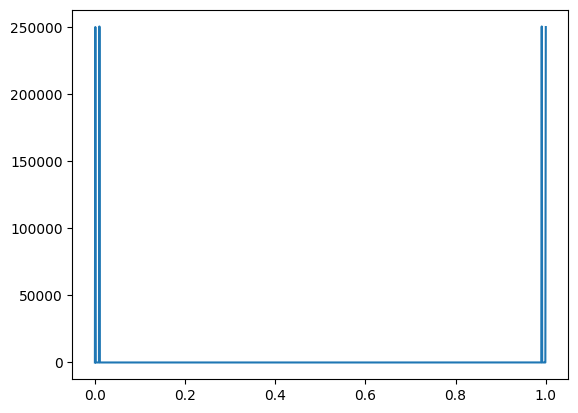

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 1000)
f = np.sin(2*np.pi*x) + np.cos(2*np.pi*10*x)
fft = np.fft.fft(f)
# fft = np.abs(fft)
plt.plot(x, fft.conj()*fft)

Task 2

Remove all wavelengths smaller than $0.3$. Compute and plot the inverse transform the function. What do you see and why?

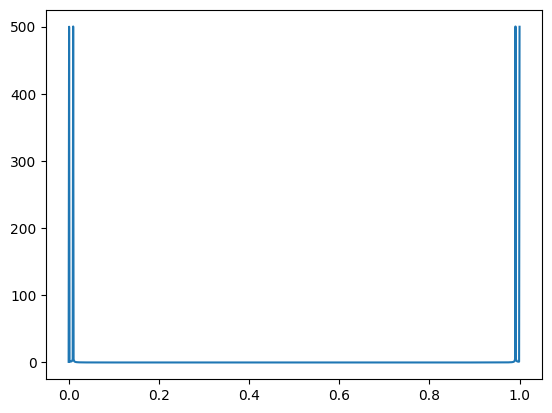

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 1000)

freq = np.fft.fftfreq(1000, d=0.001)

f = np.sin(2*np.pi*x) + np.cos(2*np.pi*10*x)

fft = np.fft.fft(f)

plt.plot(x, np.abs(np.fft.fft(f)))

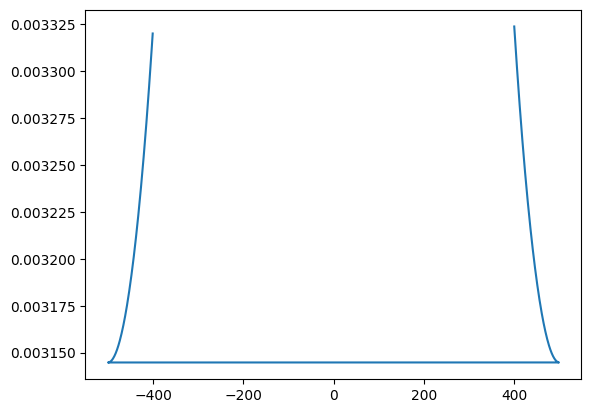

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 1000)

freq = np.fft.fftfreq(1000, d=0.001)

f = np.sin(2*np.pi*x) + np.cos(2*np.pi*10*x)
fft = np.fft.fft(f)
# fft = np.abs(fft)
plt.plot(freq[400:600], np.sqrt(fft.conj()*fft)[400:600])

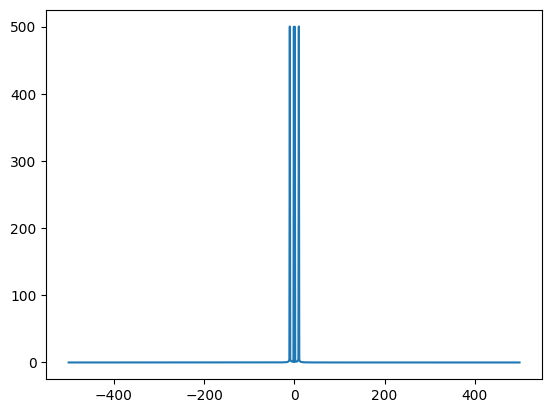

In [20]:
ps = np.sqrt(fft.conj()*fft)
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(ps))

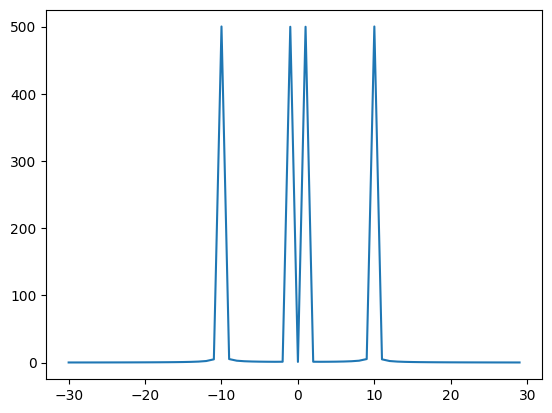

In [21]:

ps = np.sqrt(fft.conj()*fft)
plt.plot(np.fft.fftshift(freq)[470:530], np.fft.fftshift(ps)[470:530])

# contribution to the power spectrum at a low frequency and a high frequency

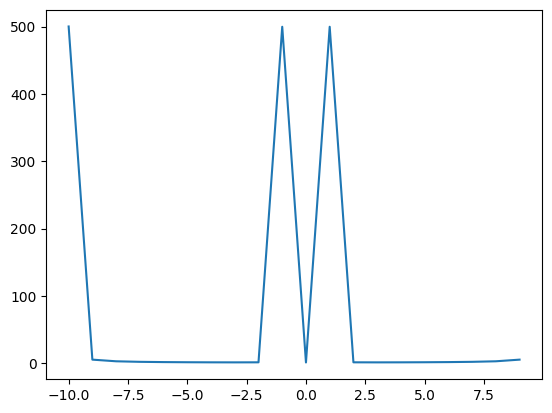

In [22]:
np.fft.fftshift(ps)[490:510]
plt.plot(np.fft.fftshift(freq)[490:510], np.fft.fftshift(ps)[490:510])

In [23]:
np.fft.fftshift(ps[(ps).real > 0.3].real)

array([3.37756706e-01, 3.87597401e-01, 4.50951600e-01, 5.33754034e-01,
       6.45927913e-01, 8.05388097e-01, 1.04806663e+00, 1.45806122e+00,
       2.28869462e+00, 4.81730719e+00, 5.00167852e+02, 5.21920416e+00,
       2.77056798e+00, 1.96230658e+00, 1.57006049e+00, 1.34861605e+00,
       1.21957216e+00, 1.16105601e+00, 1.23725798e+00, 4.99750070e+02,
       1.00000000e+00, 4.99750070e+02, 1.23725798e+00, 1.16105601e+00,
       1.21957216e+00, 1.34861605e+00, 1.57006049e+00, 1.96230658e+00,
       2.77056798e+00, 5.21920416e+00, 5.00167852e+02, 4.81730719e+00,
       2.28869462e+00, 1.45806122e+00, 1.04806663e+00, 8.05388097e-01,
       6.45927913e-01, 5.33754034e-01, 4.50951600e-01, 3.87597401e-01,
       3.37756706e-01])

In [24]:
np.fft.fftshift(freq[(ps).real > 0.3].real)

array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

In [25]:
np.abs(np.fft.fftshift(freq)) < 3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

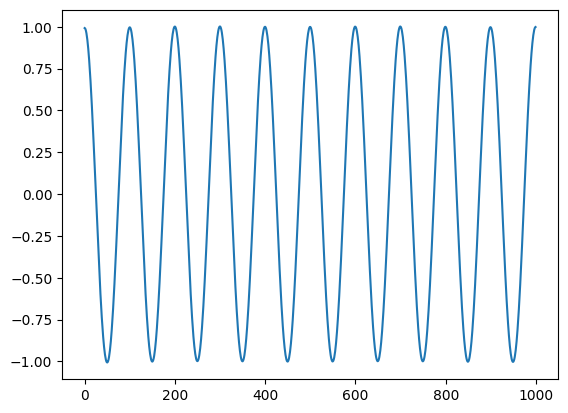

In [26]:
cut_off =  np.fft.fftshift(fft)[np.abs(np.fft.fftshift(freq)) < 3] = 0
fft_c = fft.copy()
fft_c[np.abs(freq) < 3] = 0
fft_c

plt.plot(np.fft.ifft(fft_c))


# At first we have two superimposed waves. The cosine wave has a 10 times higher frequency than the sine wave.
# Since we cut out the low frequency part, we only see the high frequency wave in the plot.

Two-dimensional transforms 

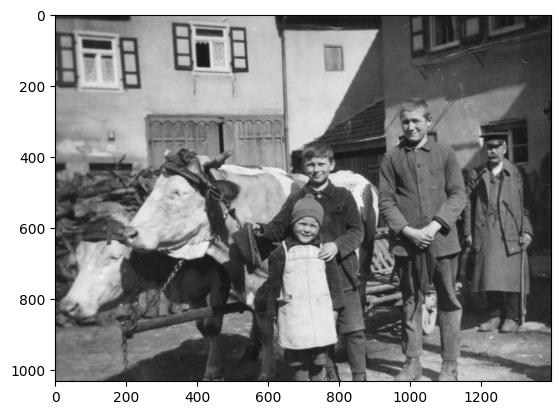

In [27]:
import cv2
img = cv2.imread('Picture.jpg', 0)
plt.imshow(img, cmap='gray')

Task 1

Plot the power spectrum of the above image. It can be useful to use the function numpy.fftshift and/or numpy.ifftshift to shift the zero wavevector components to the center of the image.

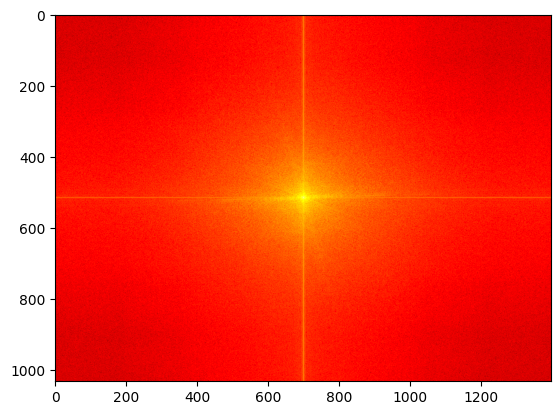

In [28]:
img_fft = np.fft.fftshift(np.fft.fft2(img))
img_fft_noshift = np.fft.fft2(img)

"""
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(vs2.magitude(dft_shift[0], dft_shift[1))

"""

img_fft

img_ps = np.log(img_fft.conj()*img_fft).real

plt.imshow(img_ps, cmap='hot')

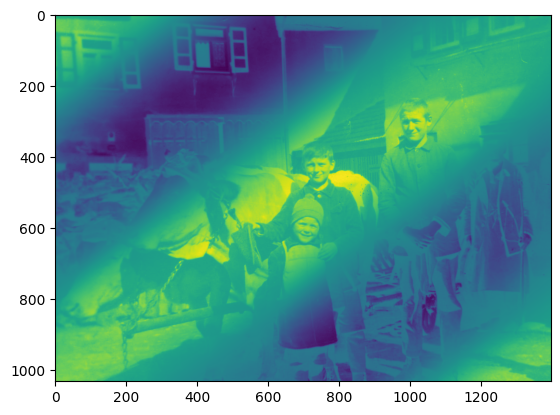

In [29]:
plt.imshow(np.fft.ifft2(np.fft.fftshift(img_fft)).real)

Task 2

Successively remove the long wavelength contribution to the image. Compute the inverse FFT and display the image again. What do you see and why?

/tmp/ipykernel_2059/2913058951.py:8: RuntimeWarning: divide by zero encountered in log
  img_ps2 = np.log(img_fft.conj()*img_fft).real


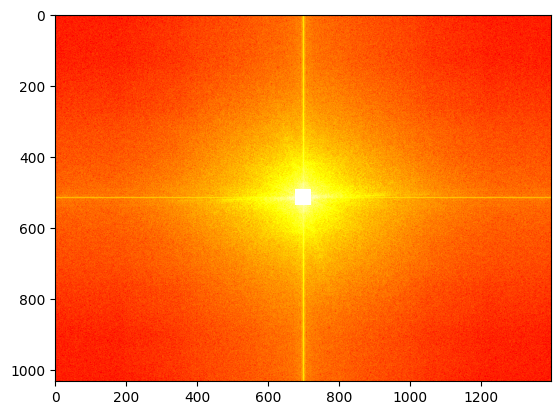

In [30]:
cx = img_fft.shape[1]//2
cy = img_fft.shape[0]//2

# 1031, 1397

img_fft[cy-20:cy+20, cx-20:cx+20] = 0

img_ps2 = np.log(img_fft.conj()*img_fft).real

plt.imshow(img_ps2, cmap='hot')

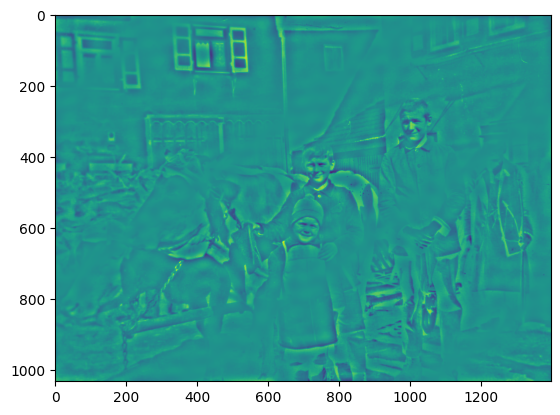

In [31]:
plt.imshow(np.fft.ifft2(np.fft.fftshift(img_fft)).real)